In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import nibabel as nib
import numpy as np
from get_min_max_voxel import summary
from glob import glob
from srgan_3d_vgg import SRGAN
import data_loader
from data_loader import DataLoader, test_preprocessing, show_slices, clear_samples

Using TensorFlow backend.


In [2]:
trainset_path = "trainset/**/*.nii"
testset_path = "testset/**/*.nii"
#H_R = (168, 168, 144, 1)
#L_R = (42, 168, 144, 1)
H_R = (128, 128, 110, 1)
L_R = (32, 128, 110, 1)

In [3]:
gan = SRGAN(lr=L_R, hr=H_R, n_residual_blocks=10, gpus=1)
n = gan.data_loader.get_file_count(trainset_path)
print("number of images in trainset", n)

number of images in trainset 2722


In [4]:
#gan.generator.summary()
#gan.free_memory()
gan.load_model()

trainset/ADNI_Dataset/2428/ADNI/006_S_0498/MPR__GradWarp__B1_Correction__N3__Scaled/2007-03-13_11_56_19.0/S28000/ADNI_006_S_0498_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070605120544724_S28000_I55930.nii

38 time:0:00:30.218008 d_loss:0.038493 d_acc:0.991071 g_d_loss:5811.592773 g_mse_loss:0.562460


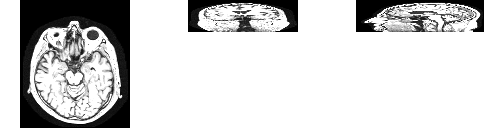

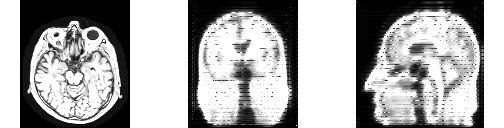

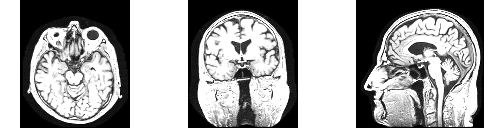

training G net: 0  g_loss: [6034.357, 0.66526705, 0.0071594487, 59.67823]


In [ ]:
%autosave 100
epochs=2
num_g_per_d=3
gan.train(trainset_path, iterations=n*epochs, batch_size=1, 
          sample_interval=200*num_g_per_d, save_interval=20*num_g_per_d, num_g_per_d=num_g_per_d)

In [ ]:
gan.save_model()

In [ ]:
#gan.sample_images(dataset_path=trainset_path, iteration=0)

In [ ]:
#{(192, 192, 160): 1036, (256, 256, 180): 294, (256, 256, 166): 1046, (256, 256, 170): 298, (256, 256, 184): 56, (256, 256, 162): 2, (256, 256, 146): 1, (256, 256, 165): 1, (256, 256, 124): 1, (256, 256, 161): 3, (256, 256, 150): 3}